In [1]:
from sentence_transformers import SentenceTransformer
import py_vncorenlp
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
cwd = os.getcwd()

In [3]:
model = SentenceTransformer('bkai-foundation-models/vietnamese-bi-encoder')
rdr = py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir=r'D:\Models\vncorenlp')
os.chdir(cwd)

In [4]:
df = pd.read_csv('vnexpress_demo.csv')
df.drop_duplicates(inplace=True)
df

,Title,Link,Field
0,Kiện cháu trai vì cắt tóc dịp Tết,https://vnexpress.net/kien-chau-trai-vi-cat-to...,Đời sống
1,Lee Jae Wook hẹn hò ca sĩ Karina,https://vnexpress.net/lee-jae-wook-hen-ho-ca-s...,Giải trí
2,Carragher: 'Man Utd phòng ngự tệ chưa từng thấy',https://vnexpress.net/carragher-man-utd-phong-...,Thể thao
3,Ông Biden: Israel đồng ý đình chiến ở Gaza tro...,https://vnexpress.net/ong-biden-israel-dong-y-...,Thế giới
4,Cách làm sạch tai an toàn,https://vnexpress.net/cach-lam-sach-tai-an-toa...,Đời sống
...,...,...,...
65,Neville: 'Man Utd đã quyết định về tương lai c...,https://vnexpress.net/neville-man-utd-da-quyet...,Thể thao
66,Nga dùng chiến thuật thiết xa vận áp đảo phòng...,https://vnexpress.net/nga-dung-chien-thuat-thi...,Thế giới
67,Cha con Chủ tịch Tân Hoàng Minh Đỗ Anh Dũng hầ...,https://vnexpress.net/cha-con-chu-tich-tan-hoa...,Pháp luật
68,Bitcoin vượt 56.000 USD,https://vnexpress.net/bitcoin-vuot-56-000-usd-...,Kinh doanh


In [5]:
sentences = [" ".join(rdr.word_segment(sent)) for sent in df['Title'].tolist()]

embeddings = model.encode(sentences)
print(type(embeddings))

<class 'numpy.ndarray'>


In [6]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(2, 51)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(embeddings)
	kmeanModel.fit(embeddings)

	distortions.append(sum(np.min(cdist(embeddings, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / embeddings.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(embeddings, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / embeddings.shape[0]
	mapping2[k] = kmeanModel.inertia_

c:\Users\hugovoxx\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hugovoxx\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hugovoxx\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hugovoxx\AppData\Local\Programs\Python\Python311\Lib\site-packages\

Best K: 32


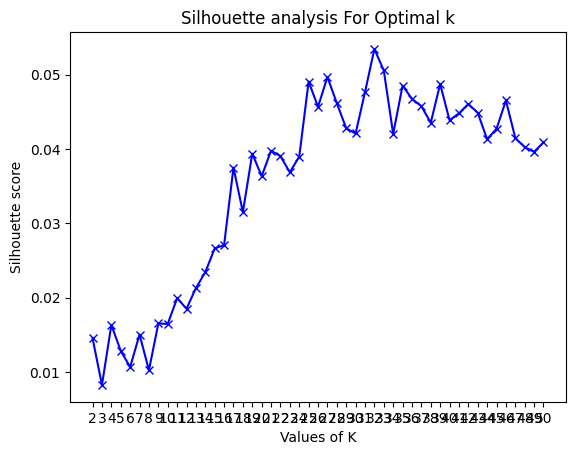

In [7]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score
silhouette_avg = []
for num_clusters in list(range(2,51)):
    kmeans = KMeans(n_clusters=num_clusters, init = "k-means++", n_init = 10)
    kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, kmeans.labels_)
    silhouette_avg.append(score)

import matplotlib.pyplot as plt
plt.plot(np.arange(2,51),silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
_ = plt.xticks(np.arange(2,51))

print (f"Best K: {np.argmax(silhouette_avg)+2}")

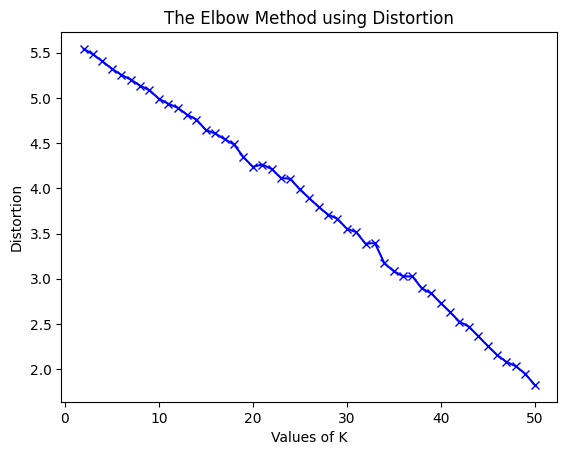

In [8]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [9]:
pca = PCA(2)
 
#Transform the data
data = pca.fit_transform(embeddings)
 
data.shape

(70, 2)

In [10]:
kmeans = KMeans(n_clusters=32, random_state=0, n_init="auto").fit(embeddings)
mean = pca.transform(kmeans.cluster_centers_)
mean.shape

(32, 2)

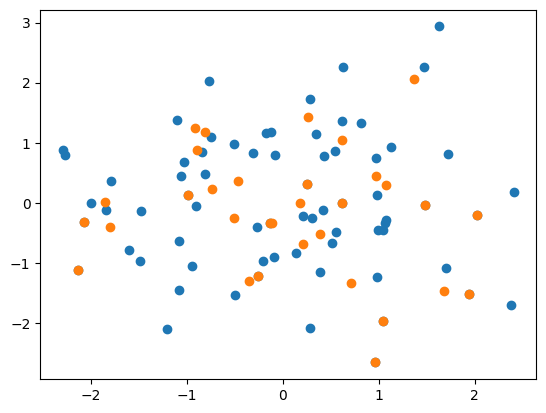

In [11]:
plt.scatter(data[:,0],data[:,1])
plt.scatter(mean[:,0],mean[:,1])
plt.show()

In [12]:
y_kmeans = kmeans.predict(embeddings)

In [13]:
pd.set_option('display.max_colwidth', None)

In [17]:
df.iloc[np.where(y_kmeans == 10)]

,Title,Link,Field
11,CapitaLand gây quỹ 30.000 USD cho trẻ em,https://vnexpress.net/capitaland-gay-quy-30-000-usd-cho-tre-em-4715445.html,Bất động sản
25,Phác đồ giờ vàng cứu sống hàng trăm trẻ sinh cực non,https://vnexpress.net/phac-do-gio-vang-cuu-song-hang-tram-tre-sinh-cuc-non-4715846.html,Sức khỏe
61,16 năm Brazil áp dụng 'luật không cồn' với lái xe,https://vnexpress.net/16-nam-brazil-ap-dung-luat-khong-con-voi-lai-xe-4714450.html,Thế giới
